In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,AdaBoostRegressor,BaggingClassifier
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

D:\dse\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\dse\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\dse\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\dse\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
d=pd.read_csv('DATA.csv')
d.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
d.shape

(59381, 128)

In [5]:
d.info('Id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
Id                     int64
Product_Info_1         int64
Product_Info_2         object
Product_Info_3         int64
Product_Info_4         float64
Product_Info_5         int64
Product_Info_6         int64
Product_Info_7         int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2      int64
Employment_Info_3      int64
Employment_Info_4      float64
Employment_Info_5      int64
Employment_Info_6      float64
InsuredInfo_1          int64
InsuredInfo_2          int64
InsuredInfo_3          int64
InsuredInfo_4          int64
InsuredInfo_5          int64
InsuredInfo_6          int64
InsuredInfo_7          int64
Insurance_History_1    int64
Insurance_History_2    int64
Insurance_History_3    int64
Insurance_History_4    int64
Insurance_History_5    float64
I

In [6]:
d.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
# Finding the percent of null values
x=list(d.columns)
for y in range (0,128):
    a=d[x[y]].isnull().sum()
    if  a>0:
        b=(a/59381)*100
        print(x[y],' =  ',b,'%')
        y=y+1

Employment_Info_1  =   0.031996766642528755 %
Employment_Info_4  =   11.41610952998434 %
Employment_Info_6  =   18.278573954631952 %
Insurance_History_5  =   42.7678887186137 %
Family_Hist_2  =   48.25786025833179 %
Family_Hist_3  =   57.66322561088564 %
Family_Hist_4  =   32.3066300668564 %
Family_Hist_5  =   70.41141105740894 %
Medical_History_1  =   14.969434667654639 %
Medical_History_10  =   99.06198952526903 %
Medical_History_15  =   75.1014634310638 %
Medical_History_24  =   93.59896263114464 %
Medical_History_32  =   98.1357673329853 %


In [8]:
#Dropping the columns which have more than 50% of null values
d.drop(['Id','Ht','Wt','Family_Hist_2','Family_Hist_3','Family_Hist_5','Medical_History_10',
      'Medical_History_15','Medical_History_24','Medical_History_32'],axis=1,inplace=True)

In [9]:
# Imputing null values in features with less than 50 % null values
d['Employment_Info_1'].fillna(d['Employment_Info_1'].median(),inplace=True)
d['Employment_Info_4'].fillna(d['Employment_Info_4'].median(),inplace=True)
d['Employment_Info_6'].fillna(d['Employment_Info_6'].median(),inplace=True)
d['Insurance_History_5'].fillna(d['Insurance_History_5'].median(),inplace=True)
d['Family_Hist_4'].fillna(d['Family_Hist_4'].median(),inplace=True)
d['Medical_History_1'].fillna(1,inplace=True)

In [10]:
#converting the correlation matrix into dataframe
d1=pd.DataFrame(d.corr())


In [11]:
# Extracting the columns which have correlation more than 0.4
df = d1.where(np.triu(np.ones(d1.shape)).astype(np.bool))
a=list(df.columns)
b=a
for y in range(0,117):
    q=list(df[a[y]])
    for i in q:
        if i> 0.4 and a[y]!=b[q.index(i)]:
            
            print(a[y],'--',b[q.index(i)],' = ',i)

InsuredInfo_7 -- InsuredInfo_2  =  0.5087155135728652
Insurance_History_4 -- Insurance_History_1  =  0.5672153896999304
Insurance_History_7 -- Insurance_History_1  =  0.4586056676825122
Insurance_History_7 -- Insurance_History_4  =  0.9195259814197974
Insurance_History_8 -- Insurance_History_1  =  0.7877234559145828
Insurance_History_9 -- Insurance_History_1  =  0.5085844516104937
Insurance_History_9 -- Insurance_History_4  =  0.9386544745126755
Insurance_History_9 -- Insurance_History_7  =  0.9625280994167774
Family_Hist_4 -- Ins_Age  =  0.5907509990624774
Medical_History_36 -- Medical_History_25  =  0.9541101722846125
Medical_Keyword_1 -- Medical_History_16  =  0.46476010319662225
Medical_Keyword_16 -- Medical_History_18  =  0.4689211178690135
Medical_Keyword_22 -- Medical_History_21  =  0.536244883658995
Medical_Keyword_30 -- Medical_History_19  =  0.8409466745887633
Medical_Keyword_34 -- Medical_History_18  =  0.6053300357526505
Medical_Keyword_41 -- Medical_History_30  =  0.428327

In [12]:
x=pd.get_dummies(d['Product_Info_2'],prefix='ProductInfo2',drop_first=True)
x.head()

,ProductInfo2_A2,ProductInfo2_A3,ProductInfo2_A4,ProductInfo2_A5,ProductInfo2_A6,ProductInfo2_A7,ProductInfo2_A8,ProductInfo2_B1,ProductInfo2_B2,ProductInfo2_C1,ProductInfo2_C2,ProductInfo2_C3,ProductInfo2_C4,ProductInfo2_D1,ProductInfo2_D2,ProductInfo2_D3,ProductInfo2_D4,ProductInfo2_E1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
d=pd.concat([d,x],axis=1)

In [14]:
d.drop('Product_Info_2',axis=1,inplace=True)

In [15]:
j=[]
l=[]
u=[]
a=list(d.columns)
for y in range(0,134):
    q3=d[a[y]].quantile(0.75)
    q1=d[a[y]].quantile(0.25)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    if ul!=ll:
        
        for i in d[a[y]]:
            if i>ul or i<ll:
                j.append(a[y])
                l.append(ll)
                u.append(ul)
print('Features with outliers',set(j))
print('lower boundary of features',set(l))
print('Upper boundary of features',set(u))

Features with outliers {'Medical_History_1', 'BMI', 'Employment_Info_1', 'Insurance_History_5', 'Family_Hist_4'}
lower boundary of features {0.1645042030000001, -0.0625, 0.21126760599999997, -0.00023333299999999996, -9.5}
Upper boundary of features {0.7538703469999999, 0.1975, 0.66197183, 0.0021666669999999997, 18.5}


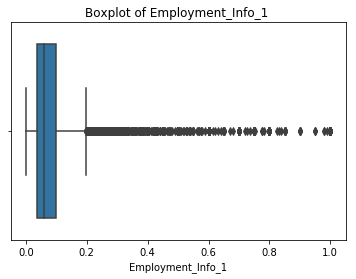

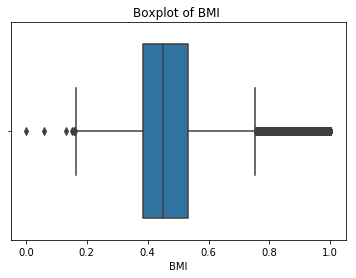

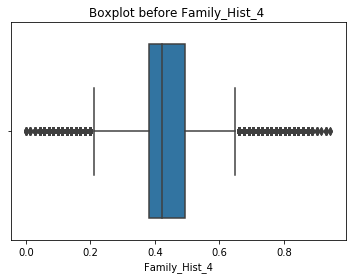

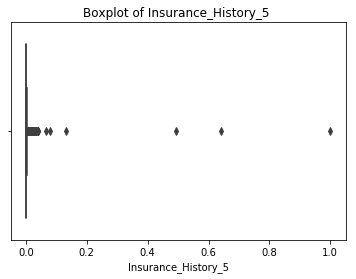

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(d['Employment_Info_1'])
plt.title('Boxplot of Employment_Info_1 ')
plt.show()

sns.boxplot(d['BMI'])
plt.title('Boxplot of BMI ')
plt.show()

sns.boxplot(d['Family_Hist_4'])
plt.title('Boxplot before Family_Hist_4 ')
plt.show()

sns.boxplot(d['Insurance_History_5'])
plt.title('Boxplot of Insurance_History_5 ')
plt.show()

In [17]:
print('Skewness of features')
print('Insurance_History_5 = ',d['Insurance_History_5'].skew())
print('Family_Hist_4 = ',d['Family_Hist_4'].skew())
print('Employment_Info_1 = ',d['Employment_Info_1'].skew())
print('BMI = ',d['BMI'].skew())

Skewness of features
Insurance_History_5 =  134.89155609994165
Family_Hist_4 =  0.4091113228795351
Employment_Info_1 =  4.709403418654449
BMI =  0.944260717685289


In [18]:
for col in ['Insurance_History_5','Family_Hist_4','Employment_Info_1','BMI']:
    percentiles = d[col].quantile([0.01,0.99]).values
    d[col][d[col] <= percentiles[0]] = percentiles[0]
    d[col][d[col] >= percentiles[1]] = percentiles[1]

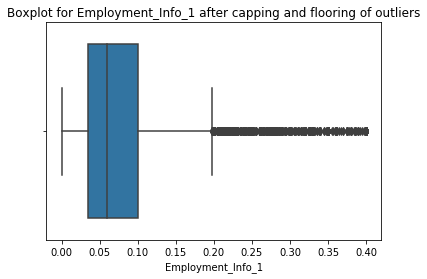

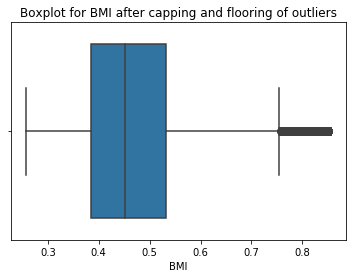

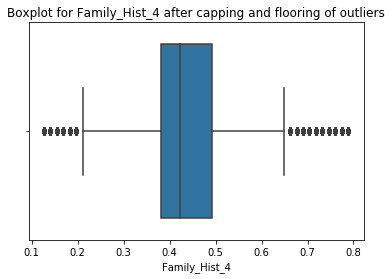

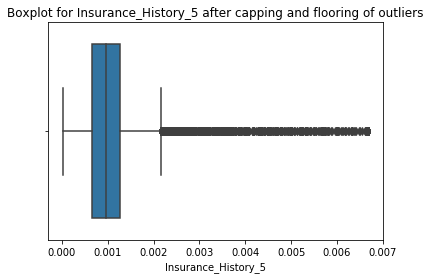

In [19]:
sns.boxplot(d['Employment_Info_1'])
plt.title('Boxplot for Employment_Info_1 after capping and flooring of outliers')
plt.show()

plt.title('Boxplot for BMI after capping and flooring of outliers')
sns.boxplot(d['BMI'])
plt.show()

plt.title('Boxplot for Family_Hist_4 after capping and flooring of outliers')
sns.boxplot(d['Family_Hist_4'])
plt.show()


plt.title('Boxplot for Insurance_History_5 after capping and flooring of outliers')
sns.boxplot(d['Insurance_History_5'])
plt.show()

In [20]:
print('Skewness of features')
print('Insurance_History_5 = ',d['Insurance_History_5'].skew())
print('Family_Hist_4 = ',d['Family_Hist_4'].skew())
print('Employment_Info_1 = ',d['Employment_Info_1'].skew())
print('BMI = ',d['BMI'].skew())

Skewness of features
Insurance_History_5 =  2.6319732668048093
Family_Hist_4 =  0.4072228128371821
Employment_Info_1 =  2.2854012387923675
BMI =  0.8166862152362031


In [21]:
d.groupby(['Response'])['Employment_Info_1'].count()

Response
1     6207
2     6552
3     1013
4     1428
5     5432
6    11233
7     8027
8    19489
Name: Employment_Info_1, dtype: int64

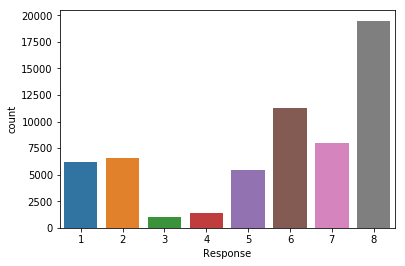

In [22]:
sns.countplot(d['Response'])

In [23]:
x=d.drop(['Response'], axis=1)
y=d[['Response']]

In [24]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x,y= smt.fit_sample(x,y)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.649377859494591


In [27]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler().fit_transform(d)
x_train =StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [28]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_2 = pca.fit_transform(x_train)
X_test_2 = pca.transform(x_test)


In [29]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([4.65928406e-02, 3.02507673e-02, 2.46054876e-02, 2.13005871e-02,
       1.89993779e-02, 1.69990916e-02, 1.55109348e-02, 1.47982774e-02,
       1.41377539e-02, 1.32832422e-02, 1.32278457e-02, 1.29417158e-02,
       1.25577931e-02, 1.23943893e-02, 1.23738703e-02, 1.20493578e-02,
       1.18583909e-02, 1.17862459e-02, 1.16735343e-02, 1.12708278e-02,
       1.11046831e-02, 1.09203565e-02, 1.06669487e-02, 9.88014334e-03,
       9.54796982e-03, 9.19358646e-03, 9.11788921e-03, 8.78272506e-03,
       8.70734513e-03, 8.49268117e-03, 8.39797095e-03, 8.35169299e-03,
       8.26614267e-03, 8.19258838e-03, 8.16842856e-03, 8.10116550e-03,
       8.04928670e-03, 7.96530426e-03, 7.93122229e-03, 7.89666968e-03,
       7.85702548e-03, 7.81380480e-03, 7.79263481e-03, 7.76198139e-03,
       7.75248663e-03, 7.73135835e-03, 7.67872992e-03, 7.66610041e-03,
       7.63690011e-03, 7.61233929e-03, 7.59636729e-03, 7.58021919e-03,
       7.56805010e-03, 7.52530025e-03, 7.50486084e-03, 7.50180625e-03,
      

Text(0, 0.5, 'cumulative explained variance')

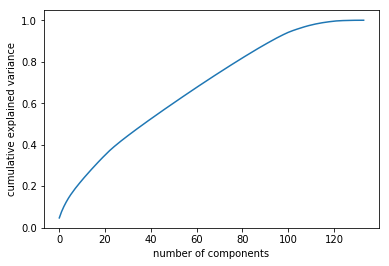

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [31]:
cumvar=np.cumsum(pca.explained_variance_ratio_)
cumvar

array([0.04659284, 0.07684361, 0.1014491 , 0.12274968, 0.14174906,
       0.15874815, 0.17425909, 0.18905736, 0.20319512, 0.21647836,
       0.22970621, 0.24264792, 0.25520571, 0.2676001 , 0.27997397,
       0.29202333, 0.30388172, 0.31566797, 0.3273415 , 0.33861233,
       0.34971701, 0.36063737, 0.37130432, 0.38118446, 0.39073243,
       0.39992602, 0.40904391, 0.41782663, 0.42653398, 0.43502666,
       0.44342463, 0.45177632, 0.46004247, 0.46823505, 0.47640348,
       0.48450465, 0.49255394, 0.50051924, 0.50845046, 0.51634713,
       0.52420416, 0.53201796, 0.5398106 , 0.54757258, 0.55532506,
       0.56305642, 0.57073515, 0.57840125, 0.58603815, 0.59365049,
       0.60124686, 0.60882708, 0.61639513, 0.62392043, 0.63142529,
       0.6389271 , 0.64639679, 0.653831  , 0.66126399, 0.66866128,
       0.67603859, 0.68340467, 0.69073202, 0.69804884, 0.70532015,
       0.71256054, 0.71978185, 0.72698296, 0.73416214, 0.74131489,
       0.74845415, 0.75555028, 0.76263756, 0.76965195, 0.77666

In [32]:
X_train_2.shape

(109138, 134)

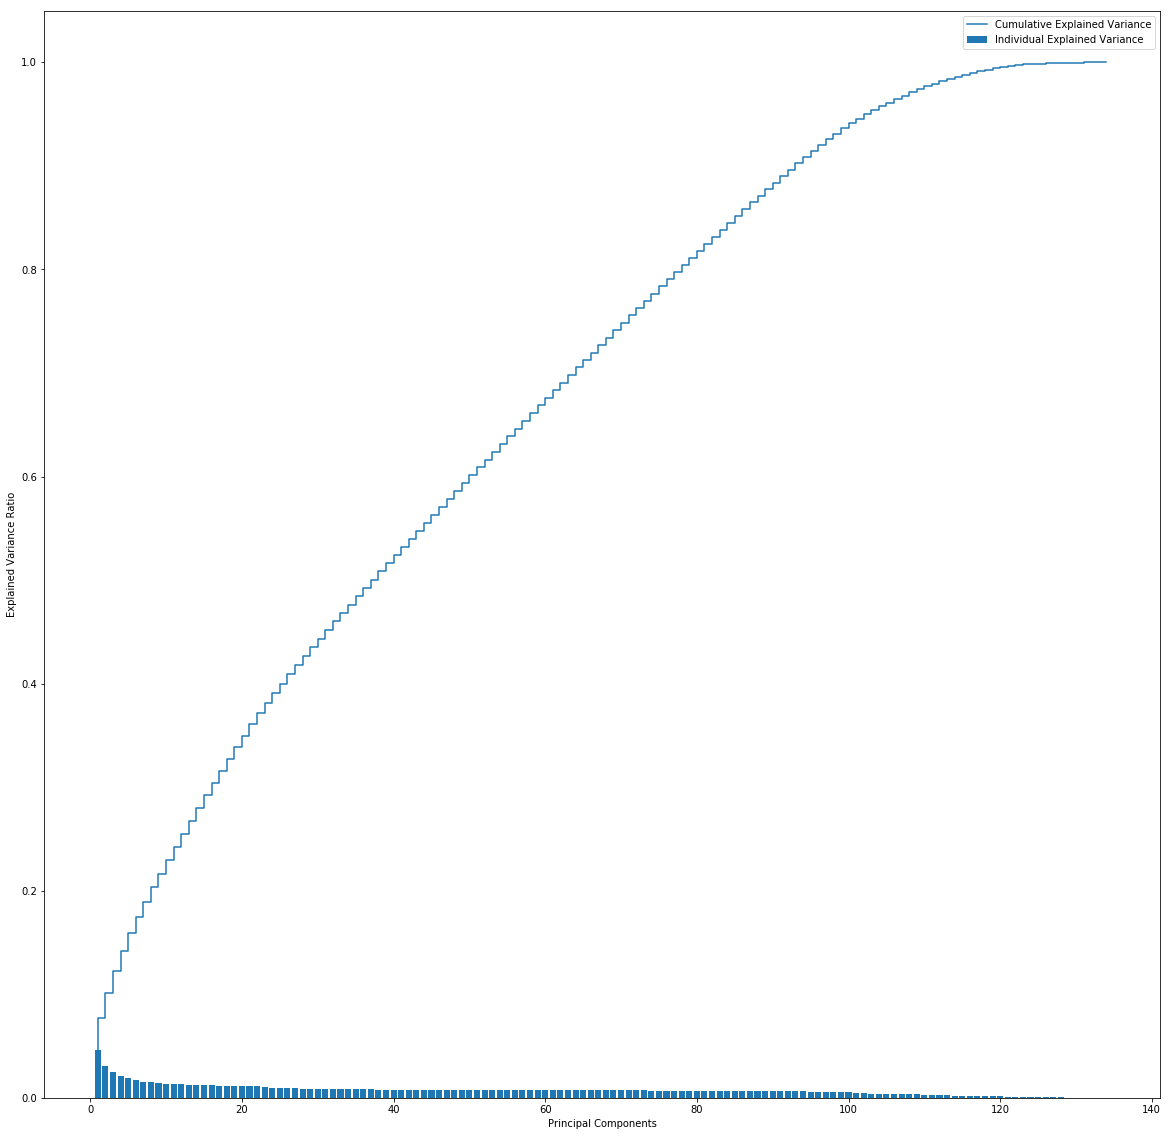

In [33]:
plt.figure(figsize=(20,20))
plt.bar(range(1,135), pca.explained_variance_ratio_, label = 'Individual Explained Variance')
plt.step(range(1,135), cumvar, label = 'Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend()
plt.show()

In [34]:
# applying rf base model
rf=RandomForestClassifier(n_estimators=20, random_state=100)
rf.fit(X_train_2,y_train)
y_pred_rf = rf.predict(X_test_2)
ac_rf= accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.6896138880574678


In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=120)
X_train_2 = pca.fit_transform(x_train)
X_test_2 = pca.transform(x_test)


In [36]:
# applying rf base model
rf=RandomForestClassifier(n_estimators=20, random_state=100)
rf.fit(X_train_2,y_train)
y_pred_rf = rf.predict(X_test_2)
ac_rf= accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.6895283704622226


In [37]:
#applying gs on base rf model
rf=RandomForestClassifier(random_state=100)
#kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'n_estimators':np.arange(1,5),'criterion':['gini','entropy'],'max_depth':np.arange(1,5)}
GS_rf=GridSearchCV(rf,param,cv=5,scoring='precision_weighted')
GS_rf.fit(X_train_2,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [38]:
#Applying base NB model
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_2, y_train)
y_pred_nb = gnb.predict(X_test_2)
ac_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score:", ac_nb)

Accuracy Score: 0.23510924872792577


In [39]:
#Applying bagging Naive Bayes
nb_bag=BaggingClassifier(base_estimator=gnb,random_state=100)
nb_bag.fit(X_train_2,y_train)
nb_bag_pred=nb_bag.predict(X_test_2)
ac_nb_bag=accuracy_score(nb_bag_pred,y_test)
print('Accuracy Score:', ac_nb_bag)

Accuracy Score: 0.23532304271603882


In [ ]:
#applying gs on bagging nb model
kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'n_estimators':np.arange(1,20)}
GS_nb_bag=GridSearchCV(nb_bag,param,cv=kf,scoring='precision_weighted')
GS_nb_bag.fit(X_train_2,y_train)

In [ ]:
#Base dt model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train_2,y_train)
y_pred_dt=dt.predict(X_test_2)
ac_dt=accuracy_score(y_pred_dt,y_test)
print('Accuracy Score:', ac_dt)

In [ ]:
#applying gs on base dt model
dt=DecisionTreeClassifier()
kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}
GS_dt=GridSearchCV(dt,param,cv=kf,scoring='precision_weighted')
GS_dt.fit(X_train_2,y_train)

In [ ]:
# applying bagging for above decision tree

In [ ]:
dt_bag=BaggingClassifier(base_estimator=dt,random_state=100)
dt_bag.fit(X_train_2,y_train)
dt_bag_pred=dt_bag.predict(X_test_2)
ac_dt_bag=accuracy_score(dt_bag_pred,y_test)
print('Accuracy Score:', ac_dt_bag)

In [ ]:
#applying gs on bagging dt model
kf=KFold(n_splits=5,shuffle=True,random_state=100)
param={'n_estimators':np.arange(1,100),'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}
GS_dt_bag=GridSearchCV(dt_bag,param,cv=kf,scoring='precision_weighted')
GS_dt_bag.fit(X_train_2,y_train)

In [ ]:
#Applying base knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_2,y_train)
y_pred_knn=knn.predict(X_test_2)
ac_knn=accuracy_score(y_pred,y_pred_knn)
print('Accuracy Score:', ac_knn)

In [ ]:
#Applying gs on base knn
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS_knn=GridSearchCV(knn,param,cv=kf,scoring='recall_weighted')
GS_knn.fit(X_train_2,y_train)

In [ ]:
#Bagged knn
knn_bag=BaggingClassifier(base_estimator=knn,random_state=100)
knn_bag.fit(X_train_2,y_train)
knn_bag_pred=knn_bag.predict(X_test_2)
ac_knn=accuracy_score(knn_bag_pred,y_test)
print('Accuracy Score:', ac_knn)

In [ ]:
#Applying gs on bagged knn
from sklearn.model_selection import GridSearchCV
knn_bag=KNeighborsClassifier()
param={'n_estimators':np.arange(1,100),'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS_knn_bag=GridSearchCV(knn_bag,param,cv=kf,scoring='recall_weighted')
GS_knn_bag.fit(X_train_2,y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold

0        10
1        26
2        26
3        10
4        26
5        26
6        10
7        26
8        26
9        21
10       26
11       26
12       26
13       26
14       26
15       26
16       26
17       26
18       26
19       26
20       26
21       26
22       26
23       26
24       26
25       26
26       26
27       26
28       26
29       26
         ..
59351    26
59352    10
59353    26
59354    26
59355    26
59356    10
59357    26
59358    26
59359    26
59360    26
59361    26
59362    26
59363     4
59364    26
59365    29
59366    26
59367    26
59368    26
59369    26
59370    26
59371    26
59372    26
59373    29
59374    26
59375    26
59376    10
59377    26
59378    26
59379    10
59380    26
Name: Product_Info_3, Length: 59381, dtype: int64

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()